Title: Performance Evaluation

Task 1: Regression Metrics<br>
Use metrics like RMSE and MAE for the House Prices dataset.

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Load California Housing dataset
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.15, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on validation set
y_pred = model.predict(X_val)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)

print(f'Validation RMSE: {rmse:.3f}')
print(f'Validation MAE: {mae:.3f}')


Validation RMSE: 0.733
Validation MAE: 0.535


Task 2: Classification Metrics<br>
Evaluate the Iris dataset using accuracy, precision, recall, and F1-score.

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into train (85%) and validation (15%), stratified to keep class balance
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on validation set
y_pred = clf.predict(X_val)

# Calculate metrics (macro averaging for multi-class)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='macro')
recall = recall_score(y_val, y_pred, average='macro')
f1 = f1_score(y_val, y_pred, average='macro')

print(f'Accuracy: {accuracy:.3f}')
print(f'Precision (macro): {precision:.3f}')
print(f'Recall (macro): {recall:.3f}')
print(f'F1-score (macro): {f1:.3f}')

# Alternatively, print detailed classification report
print("\nClassification Report:\n", classification_report(y_val, y_pred, target_names=iris.target_names))


Accuracy: 0.913
Precision (macro): 0.917
Recall (macro): 0.917
F1-score (macro): 0.917

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.88      0.88      0.88         8
   virginica       0.88      0.88      0.88         8

    accuracy                           0.91        23
   macro avg       0.92      0.92      0.92        23
weighted avg       0.91      0.91      0.91        23



Task 3: AUC-ROC Curve for Churn Model<br>
Generate an AUC-ROC curve to evaluate customer churn model performance.

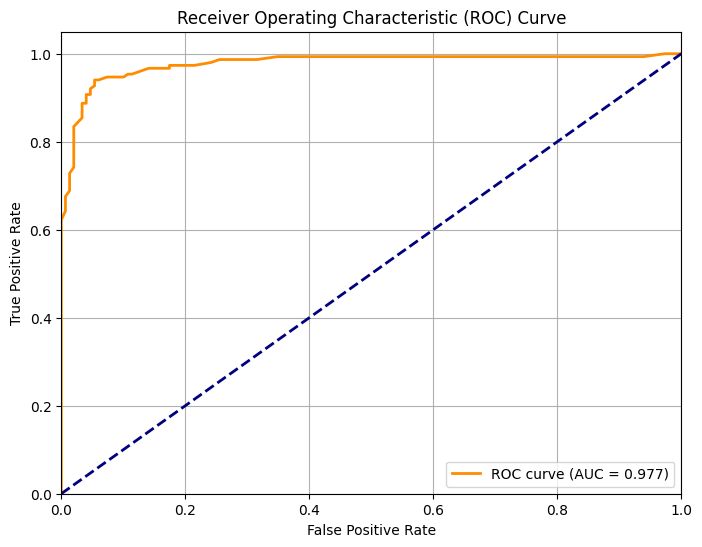

In [3]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Create synthetic churn-like dataset
X, y = make_classification(n_samples=1000, n_features=20,
                           n_informative=10, n_redundant=5,
                           n_classes=2, random_state=42)

# Split data into train and test (30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict probabilities for positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
